<h1 style="font-size:42px; text-align:center; margin-bottom:30px;"><span style="color:SteelBlue"> Churn </span> Modeling</h1>
<hr>

Welcome to the workbook for <span style="color:royalblue">Churn prediction</span>.


<h1 style="font-size:20px;"><span style="color:SteelBlue"> Problem statement: </span> To predict churn rate of customer.</h1>

Our goals are as mentioned below. 
* Predict the churn of customer.
* Understand the factors affecting customer churn of customer.
* Generate insights and help the company to fix the problem and retain customer base.


<br><hr id="toc">


In this module, we'll go through the following steps:

1.  [Data Import ](#import)
2.  [Perform Exploratory Data Analysis](#eda)
3.  [Split the data in Dev & Hold Out sample (70:30)](#split)
4.  [Logistic Model](#model)
5.  [Logistic Model on Balanced Data](#lg)
6.  [Interpretation](#lg1)

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mlp
import matplotlib.pyplot as plt
import os
import sklearn
import seaborn as sns
from sklearn.linear_model import LogisticRegression

In [2]:
def graph_version3(x,number_of_columns):
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    import seaborn as sns    
    import os
    
   
    data=x
    #if not os.path.exists(newpath):
     #   os.makedirs(newpath)
    
    if number_of_columns == None:
        for i, col in enumerate(data.columns):
            b=''
            b=data[col].dtype
            if len(data[col].unique())<15 or b==object :
                g = sns.factorplot(col, data=data, aspect=1.5, kind="count", size=4)    
                if b==object:
                    g.set_xticklabels(rotation=45)

                plt.title('Barplot of {0}'.format(col),fontsize=10)
                plt.xlabel('{0}'.format(col))
                plt.ylabel('Count')              
                #plt.savefig(newpath+'//barplot_{0}.png'.format(col))
                plt.show()

            else:
                plt.hist(data[col]) 
                plt.title('Histogram of {0}'.format(col))
                plt.xlabel('{0}'.format(col))
                plt.ylabel('Frequecy of {0}'.format(col))
                #plt.show()
                #plt.savefig(newpath+'//histogram_{0}.png'.format(col))
                plt.show()
                plt.boxplot(data[col]) 
                plt.title('Boxplot of {0}'.format(col))
                plt.xlabel('{0}'.format(col))
                #plt.show()
                #plt.savefig(newpath+'//boxplot_{0}.png'.format(col))
                plt.show()
    else:
        all_columns_we_need = data.columns[number_of_columns]
        needed_dataframe = data[all_columns_we_need]
        
         #cars=pd.read_csv('mtcars.csv')
            #our_columns = needed_dataframe[[1,3,4]]
        for i, col in enumerate(needed_dataframe.columns):
            b=''
            b=needed_dataframe[col].dtype
            if len(needed_dataframe[col].unique())<15 or b==object :
                g = sns.factorplot(col, data=needed_dataframe, aspect=1.5, kind="count", size=4)    
                if b==object:
                    g.set_xticklabels(rotation=45)

                plt.title('Barplot of {0}'.format(col),fontsize=10)
                plt.xlabel('{0}'.format(col))
                plt.ylabel('Count')
                #plt.show()
                #plt.savefig(newpath+'//barplot_{0}.png'.format(col))
                plt.show()

            else:
                plt.hist(needed_dataframe[col]) 
                plt.title('Histogram of {0}'.format(col))
                plt.xlabel('{0}'.format(col))
                plt.ylabel('Frequecy of {0}'.format(col))
                #plt.savefig(newpath+'//histogram_{0}.png'.format(col))
                plt.show()
                plt.boxplot(needed_dataframe[col]) 
                plt.title('Boxplot of {0}'.format(col))
                plt.xlabel('{0}'.format(col))
                #plt.show()
                #plt.savefig(newpath+'//boxplot_{0}.png'.format(col))
                plt.show()
            


<br id = 'eda'>
<br><hr style="border-color:royalblue;background-color:royalblue;height:1px;">
</br>

## <span style="color:RoyalBlue">1. Import Dataset</span>

In [3]:
churn=pd.read_csv('Churn.csv')

In [4]:
churn.head()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.7,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.7,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.0,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.0,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.0,3,166.7,113,41.0,7.42,10.1


<br> <hr id='end'>
                              <h1 style="font-size:16px ; text-align:center;">[Back to Contents](#toc) </h1>
</br></hr>

<br id = 'eda'>
<br><hr style="border-color:royalblue;background-color:royalblue;height:1px;">
</br>

## <span style="color:RoyalBlue">2. Exploratory Data Analysis </span>

In [5]:
churn.shape

(3333, 11)

In [6]:
churn.describe()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,0.144914,101.064806,0.903090,0.276628,0.816475,1.562856,179.775098,100.435644,56.305161,10.051488,10.237294
std,0.352067,39.822106,0.295879,0.447398,1.272668,1.315491,54.467389,20.069084,16.426032,2.535712,2.791840
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,0.000000
25%,0.000000,74.000000,1.000000,0.000000,0.000000,1.000000,143.700000,87.000000,45.000000,8.330000,8.500000
50%,0.000000,101.000000,1.000000,0.000000,0.000000,1.000000,179.400000,101.000000,53.500000,10.070000,10.300000
75%,0.000000,127.000000,1.000000,1.000000,1.780000,2.000000,216.400000,114.000000,66.200000,11.770000,12.100000
max,1.000000,243.000000,1.000000,1.000000,5.400000,9.000000,350.800000,165.000000,111.300000,18.190000,20.000000


In [7]:
churn.isnull().sum()

Churn              0
AccountWeeks       0
ContractRenewal    0
DataPlan           0
DataUsage          0
CustServCalls      0
DayMins            0
DayCalls           0
MonthlyCharge      0
OverageFee         0
RoamMins           0
dtype: int64

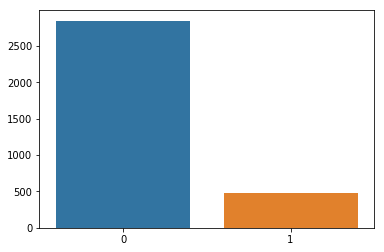

In [8]:
y = churn["Churn"].value_counts()
#print (y)
sns.barplot(y.index, y.values)

In [9]:
#checking the proportion of response variable (clear case of imbalacing)
churn.Churn.value_counts(normalize=True)*100

0    85.508551
1    14.491449
Name: Churn, dtype: float64

Ditribution : 0 are 85.5 % and 1 are 14.49 %

The below Graphs shows the distribution of variables.
1. For Categorical variables - barcharts have been plotted
2. For Numerical Variables - histogram and boxplot have been plotted

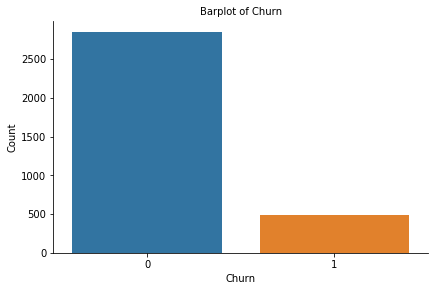

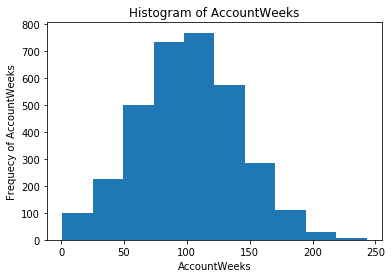

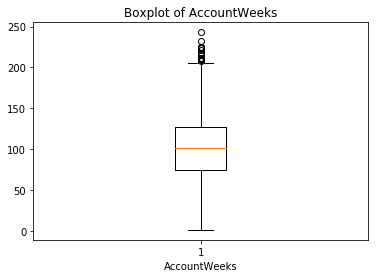

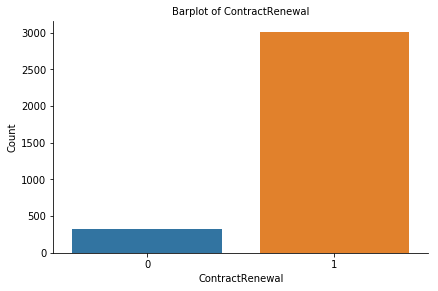

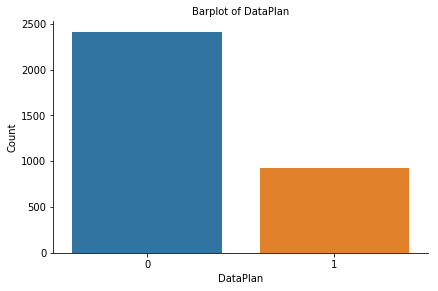

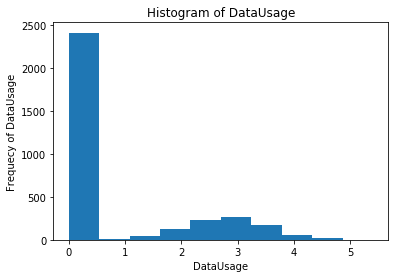

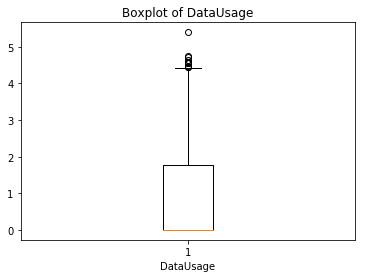

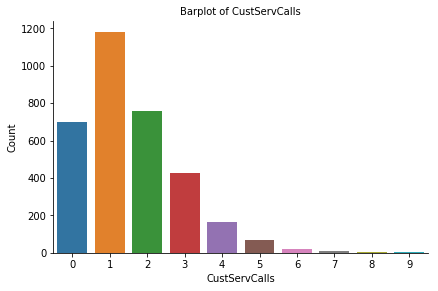

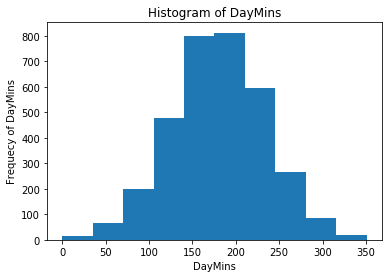

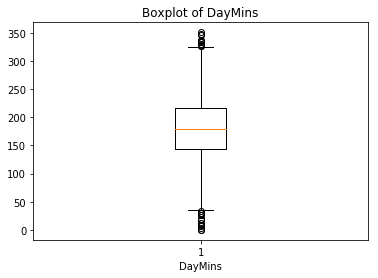

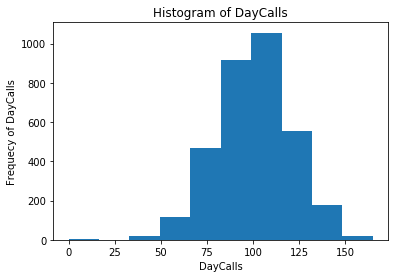

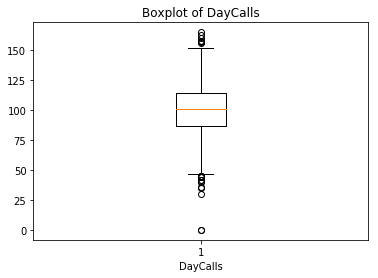

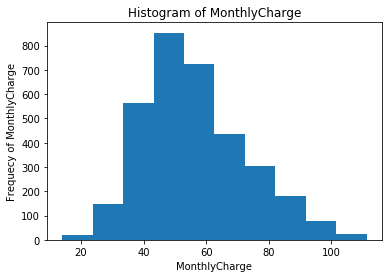

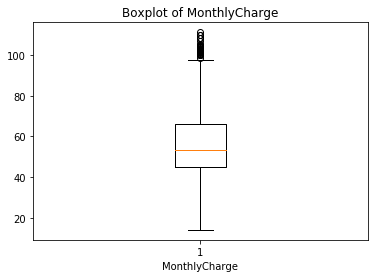

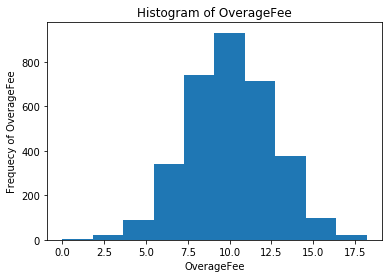

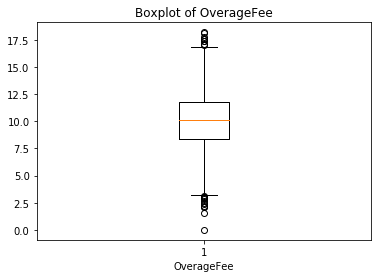

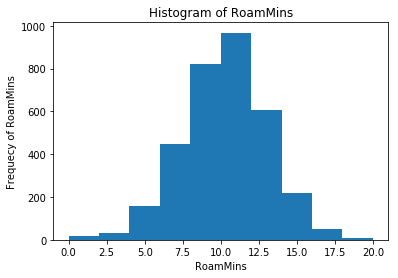

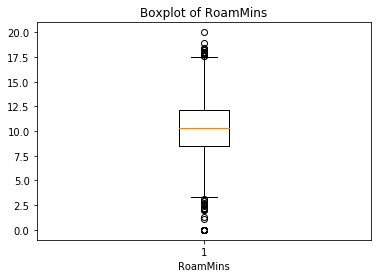

In [11]:
graph_version3(churn,None)

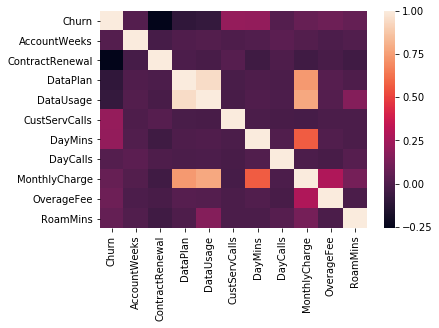

In [12]:
corr = churn.corr()
sns.heatmap(corr)

From above correlation plot following observations can be drwan:
    1. Customer servive calls is highly correlated to Data plans.
    2. Monthly charge is correlated to Data plan and Data Usage

In [13]:
# Checking the data type info of the variables
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 11 columns):
Churn              3333 non-null int64
AccountWeeks       3333 non-null int64
ContractRenewal    3333 non-null int64
DataPlan           3333 non-null int64
DataUsage          3333 non-null float64
CustServCalls      3333 non-null int64
DayMins            3333 non-null float64
DayCalls           3333 non-null int64
MonthlyCharge      3333 non-null float64
OverageFee         3333 non-null float64
RoamMins           3333 non-null float64
dtypes: float64(5), int64(6)
memory usage: 286.5 KB


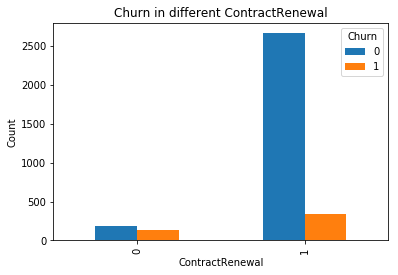

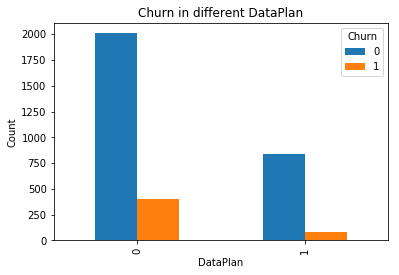

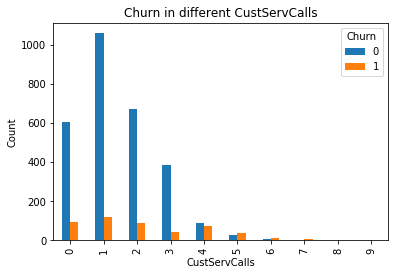

In [14]:
# Plotting graphs for Bivariate analysis to check the correlation with Attrition
xcv=['ContractRenewal','DataPlan','CustServCalls']
for i in xcv:
    pd.crosstab(churn[i],churn.Churn).plot(kind='bar')
    plt.title('Churn in different '+ i)
    #plt.xlabel(i)
    plt.ylabel('Count')
    plt.show()
    

1. This is very clear that the customers who have not renewed their contract are more likely to churn.
2. Customers are more likely to churn if they have data plan.
This is very unlikely. It indicates that there is some problem with Data Plan that needs to be checked.
3. As the customer service calls to customers increases, the churn rate increases.
This is a very useful observation that more customer service calls irritates customers and leads to churn.
This area is something the company should focus to stop churn rate.


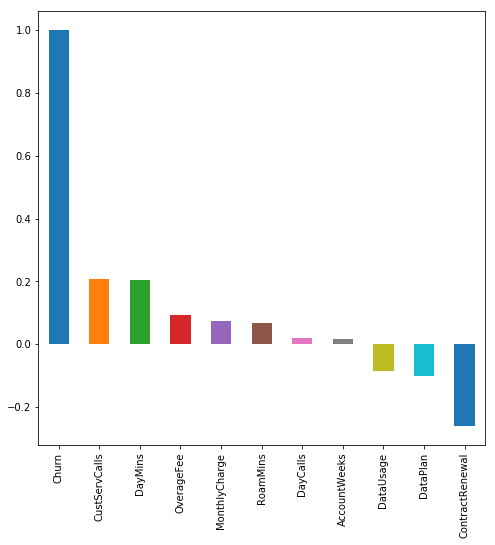

In [33]:
# Checking the correlation of Churn with other variables.
plt.figure(figsize=(8,8))
churn.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

1. Here it is clearly visible that Contract Renewal, Data plan, Data Usage are inversly related to Customer churn.
2. Account weeks, Day Calls have almost no correlation with churn.
3. Customer Service Calls, Day Mins, Overage fee and Roam mins have high correlation with customer churn.

In [16]:
# Separating Train and test data
X= churn.loc[:,churn.columns != 'Churn']
y= churn.loc[:,churn.columns =='Churn']

<br> <hr id='end'>
                              <h1 style="font-size:16px ; text-align:center;">[Back to Contents](#toc) </h1>
</br></hr>

<br id = 'split'>
<br><hr style="border-color:royalblue;background-color:royalblue;height:1px;">
</br>

## <span style="color:RoyalBlue">3. Split Data </span>

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

<br> <hr id='end'>
                              <h1 style="font-size:16px ; text-align:center;">[Back to Contents](#toc) </h1>
</br></hr>

<br id = 'model'>
<br><hr style="border-color:royalblue;background-color:royalblue;height:1px;">
</br>

## <span style="color:RoyalBlue">4. Logistic Model </span>

In [19]:
import statsmodels.api as sm
logit_model=sm.Logit(y_train,X_train)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.346936
         Iterations 7
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.172     
Dependent Variable: Churn            AIC:              1638.8044 
Date:               2019-02-25 15:29 BIC:              1696.3535 
No. Observations:   2333             Log-Likelihood:   -809.40   
Df Model:           9                LL-Null:          -977.55   
Df Residuals:       2323             LLR p-value:      5.0880e-67
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     7.0000                                       
-----------------------------------------------------------------
                  Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-----------------------------------------------------------------
AccountWeeks     -0.0028   0.0015  -1.8084 0.0705 -0.0058  0.0002
ContractRenewal  -2.2201   0.1624 -13.6720 0.0000 -2.5384 -1.9019


In [20]:
logreg = LogisticRegression()

In [21]:
logreg.fit(X_train,y_train)

C:\Users\Vinay\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [22]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.87


In [23]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.88      0.98      0.93       862
          1       0.60      0.18      0.28       138

avg / total       0.84      0.87      0.84      1000



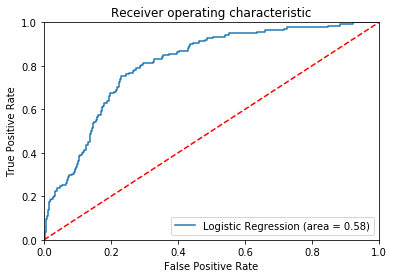

In [32]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [25]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.13
Mean Squared Error: 0.13
Root Mean Squared Error: 0.36055512754639896


1. Since Logistic model is predicting 0’s properly, so accuracy is not a very good measure to validate the model.

2. Sensitivity is very low for this model. 

3. RMSE is very high, accepting this RMSE would be a matter of concern for the company.

4. Area under ROC is 0.58, which is also very small.

5. The model is not predicting the target variable accurately.


<br> <hr id='end'>
                              <h1 style="font-size:16px ; text-align:center;">[Back to Contents](#toc) </h1>
</br></hr>

<br id = 'lg'>
<br><hr style="border-color:royalblue;background-color:royalblue;height:1px;">
</br>

## <span style="color:RoyalBlue">5. Logistic Model on Balanced Data </span>

In [26]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=12, ratio = 1.0)
x_train_res, y_train_res = sm.fit_sample(X_train, y_train)

C:\Users\Vinay\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [27]:
logreg1 = LogisticRegression()

In [28]:
logreg1.fit(x_train_res,y_train_res)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [29]:
y_pred1 = logreg1.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg1.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.76


In [30]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred1))

             precision    recall  f1-score   support

          0       0.95      0.76      0.84       862
          1       0.33      0.75      0.46       138

avg / total       0.86      0.76      0.79      1000



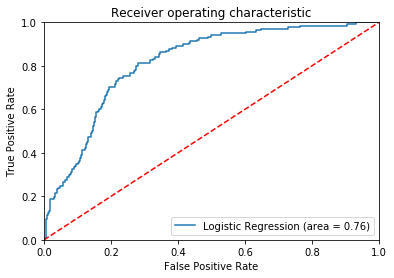

In [31]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg1.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg1.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [35]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred1))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred1))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred1)))

Mean Absolute Error: 0.244
Mean Squared Error: 0.244
Root Mean Squared Error: 0.4939635614091388


1. Accuracy for this Logistic regression model after balancing the data has reduced, which is a good sign for the model, that means it is predicting 1's properly.

2. Sensitivity is very high for this model 0.75. 

3. RMSE is very high 0.49, accepting this RMSE would be a matter of concern for the company.

4. Area under ROC is 0.76, which is also very small.

5. The model is predicting the target variable better than the previous model but not in an efficient way.

6. Some other ensemble model like XGboost, Random Forest would predict better than Logistic model.

<br> <hr id='end'>
                              <h1 style="font-size:16px ; text-align:center;">[Back to Contents](#toc) </h1>
</br></hr>

<br id = 'lg1'>
<br><hr style="border-color:royalblue;background-color:royalblue;height:1px;">
</br>

## <span style="color:RoyalBlue">6. Interpretation </span>

1. Attributes Contributing to the Customer Churn in the company:

    a. MonthlyCharge p-value 0.1143, OverageFee p-value 0.1149, DataUsage p-value 0.0721, DayMins p-value 0.0714 and AccountWeeks p-value 0.0705, from statsmodel.api logit(), shows that these variables do not have significatant affect on customer churn. So, these attributes can be ignored in building further models. That may give better accuracy.
    
    b. Customer Service calls have highest correlation with customer churn.From bivariate analysis also, as the customer service calls to customers increases, the churn rate increases.This is a very useful observation that more customer service calls irritates customers and leads to churn.This area is something the company should focus to stop churn rate.
    
    c. Contract Renewal also have high negative correlation. It is contributing to customer churn. This is also a very meaningful insight to the company to focus more on contract renewal. Customers with no contract renewal have higher churn rate. So, company should focus on providing offers to increase customers attraction towards the renewing contracts of the plan.
    
    d. Daily Mins i.e average daytime minutes per month is also a key featire which is contributing the customer churn. Company should focus on providing discounts and variety of plans and offers so that customers stick to the complanies plan and churn rate can be reduced.
    

    
    
